<center> <img src="https://miro.medium.com/v2/resize:fit:1200/1*lbDXL0IuitCRz4mpZ7MmfQ.png" width=55% > </center>

<br><br>

<center> 
    <font size="6">Final Lab (Part 2): Image Classification using Convolutional Neural Networks </font>
</center>
<center> 
    <font size="4">Computer Vision 1 University of Amsterdam</font> 
</center>
<center> 
    <font size="4">Due 23:59PM, October 18, 2024 (Amsterdam time)</font> 
</center>
<center> 
    <font size="4"><b>TA's:  Yue, Konrad & Thies</b></font>
</center>

<br><br>

***

<br><br>

<center>

Student1 ID: 13213334\
Student1 Name: Jesse Wonnink

Student2 ID: 15816397\
Student2 Name: Ruben Figge

Student3 ID: 12856320\
Student3 Name: Chileshe Lukwesa


</center>

### **Coding Guidelines**

Your code must be handed in this Jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Final Lab: Image Classification Assignment. Please also fill out your names and IDs above.

For full credit, make sure your notebook follows these guidelines:

- Please express your thoughts **concisely**. The number of words does not necessarily correlate with how well you understand the concepts.
- Understand the problem as much as you can. When answering a question, provide evidence (qualitative and/or quantitative results, references to papers, figures, etc.) to support your arguments. Not everything might be explicitly asked for, so think about what might strengthen your arguments to make the notebook self-contained and complete.
- Tables and figures must be accompanied by a **brief** description. Add a number, a title, and, if applicable, the name and unit of variables in a table, and name and unit of axes and legends in a figure.

**Late submissions are not allowed.** Assignments submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance to avoid last-minute system failure issues.

**Environment:** Since this is a project-based assignment, you are free to use any feature descriptor and machine learning tools (e.g., K-means, SVM). You should use Python for your implementation. You are free to use any Python library for this assignment, but make sure to provide a conda environment file!

**Plagiarism Note:** Keep in mind that plagiarism (submitted materials which are not your work) is a serious offense and any misconduct will be addressed according to university regulations. This includes using generative tools such as ChatGPT.

**Ensure that you save all results/answers to the questions (even if you reuse some code).**

### **Report Preparation**

Your tasks include the following:

1. **Report Preparation:** For both parts of the final project, students are expected to prepare a report. The report should include all details on implementation approaches, analysis of results for different settings, and visualizations illustrating experiments and performance of your implementation. Grading will be based on the report, so it should be as self-contained as possible. If the report contains faulty results or ambiguities, TAs can refer to your code for clarification. 

2. **Explanation of Results:** Do not just provide numbers without explanation. Discuss different settings to show your understanding of the material and processes involved.

3. **Quantitative Evaluation:** For quantitative evaluation, you are expected to provide the results based on performance (accuracy, learning loss and learning curves). 

4. **Aim:** Understand the basic Image Classification pipeline using Convolutional Neural Nets (CNN's).

5. **Working on Assignments:** Students should work in assigned groups for **two** weeks. Any questions can be discussed on ED.

    - **Submission:** Submit your source code and report together in a zip file (`ID1_ID2_ID3_part2.zip`). The report should be a maximum of 10 pages (single-column, including tables and figures, excluding references and appendix). Express thoughts concisely. Tables and figures must be accompanied by a description. Number them and, if applicable, name variables in tables, and label axes in figures.

6. **Hyperparameter Search:** In your experiments, remember to perform a hyperparameter search to find the optimal settings for your model(s). Clearly document the search process, the parameters you explored, and how they influenced the performance of your model.

8. **Format and Testing:** The report should be in **PDF format**, and the code in **.ipynb format**. Test that all functionality works as expected in the notebook.

### **Overview**

- [Section 1: Image Classification on CIFAR-100 (0 points)](#section-1)
- [Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)](#section-2)
- [Section 3: TwoLayerNet Architecture (2 points)](#section-3)
- [Section 4: ConvNet Architecture (2 points)](#section-4)
- [Section 5: Preparation of Training (7 points)](#section-5)
- [Section 6: Training the Networks (5 points)](#section-6)
- [Section 7: Setting Up the Hyperparameters (14 points)](#section-7)
- [Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)](#section-8)
- [Section 9: Fine-tuning ConvNet on STL-10 (14 points)](#section-9)
- [Section 10: Bonus Challenge (optional)](#section-10)
- [Section X: Individual Contribution Report (Mandatory)](#section-x)

### **Section 1: Image Classification on CIFAR-100 (0 points)**

The goal of this lab is to implement an image classification system using Convolutional Neural Networks (CNNs) that can identify objects from a set of classes in the [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). You will implement and compare two different architectures: a simple two-layer network and a ConvNet based on the LeNet architecture.

The CIFAR-100 dataset contains 32x32 pixel RGB images, categorized into 100 different classes. The dataset will be automatically downloaded and loaded using the code provided in this notebook.

You will train and test your classification system using the entire CIFAR-100 dataset. Ensure that the test images are excluded from training to maintain a fair evaluation of the model's performance.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import os
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
from PIL import Image
from torchinfo import summary
from torch.utils.data import DataLoader, Dataset, random_split


In [2]:

random_seed = 42
torch.manual_seed(random_seed)

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])

# Load the CIFAR-100 training set
train_set = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Load the CIFAR-100 test set
test_set = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Create data loaders for the entire CIFAR-100 dataset
train_data_loader = DataLoader(train_set, shuffle=True)
test_data_loader = DataLoader(test_set, shuffle=False)

# Define CIFAR-100 superclasses and their subclasses
superclasses = {
    'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
    'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
    'household electrical devices': ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
    'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
    'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

# List of all CIFAR-100 classes
classes = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 
           'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
           'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
           'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
           'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
           'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
           'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 
           'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 
           'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm')

# Create a mapping of class names to their indices
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}
# Create a mapping of class indices to their names
idx_to_class = {idx: cls_name for cls_name, idx in class_to_idx.items()}


# Create a mapping of superclasses to their corresponding class indices
superclass_to_indices = {supcls: [class_to_idx[cls] for cls in subclasses] for supcls, subclasses in superclasses.items()}

print("Data loaders for CIFAR-100 are ready for use.")

Files already downloaded and verified
Files already downloaded and verified
Data loaders for CIFAR-100 are ready for use.


<a id="section-2"></a>
### **Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)**

In this section, you will implement a function to visualize the CIFAR-100 dataset, including **all** superclasses and their corresponding subclasses. Your implementation should provide a clear and organized overview of the dataset's diversity.

You add the figure(s) to appendix of your report and refer to it in the main text.

Superclass: aquatic mammals


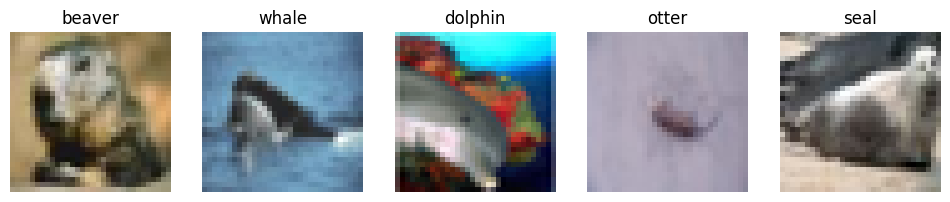

Superclass: fish


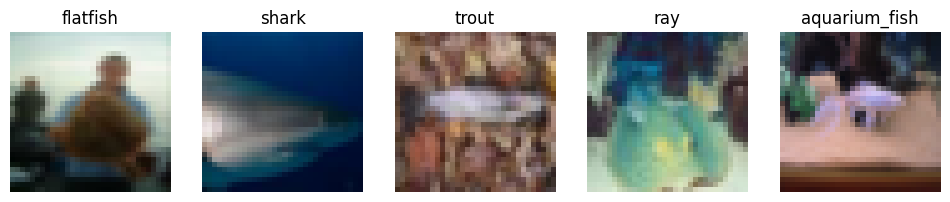

Superclass: flowers


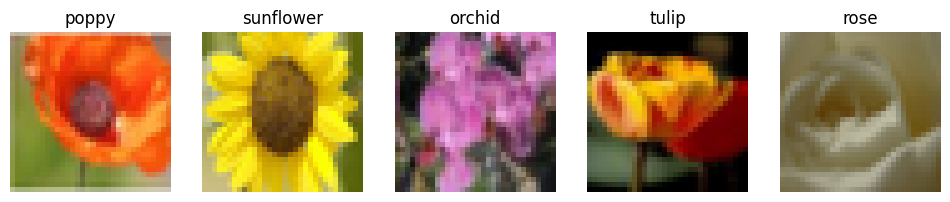

Superclass: food containers


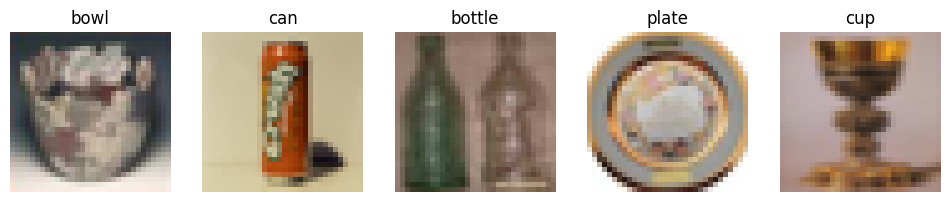

Superclass: fruit and vegetables


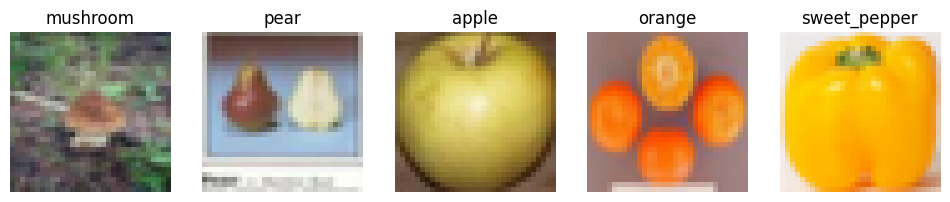

Superclass: household electrical devices


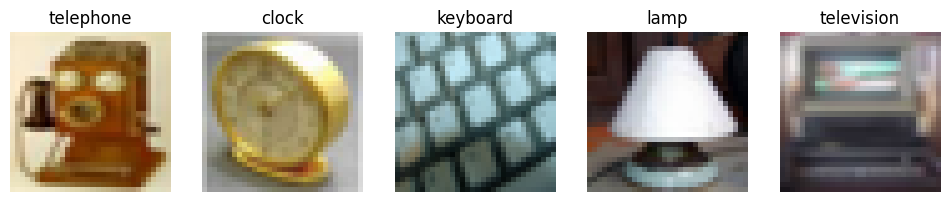

Superclass: household furniture


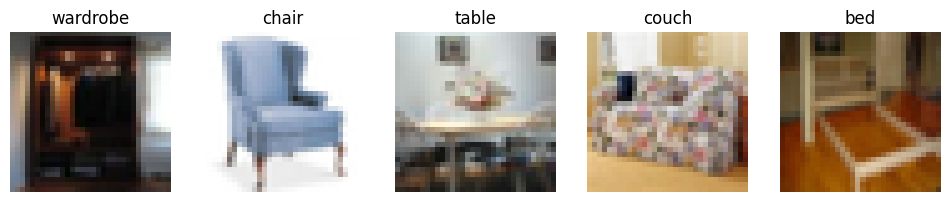

Superclass: insects


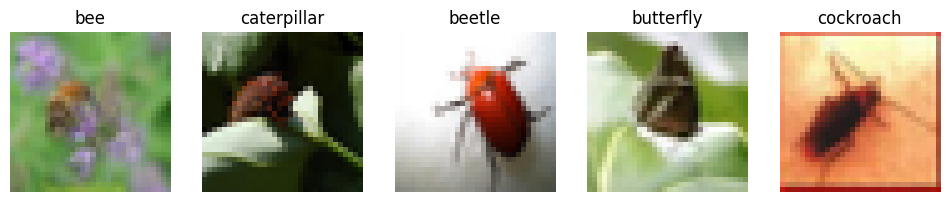

Superclass: large carnivores


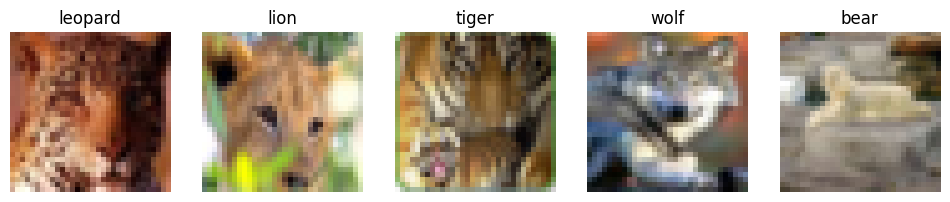

Superclass: large man-made outdoor things


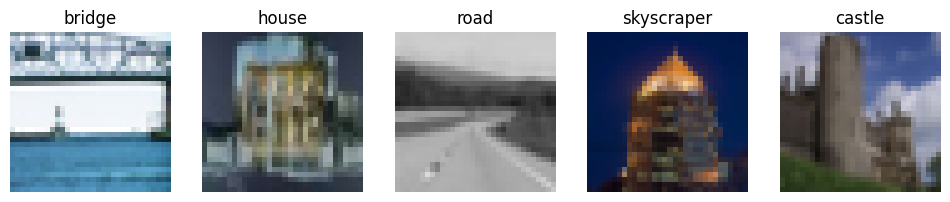

Superclass: large natural outdoor scenes


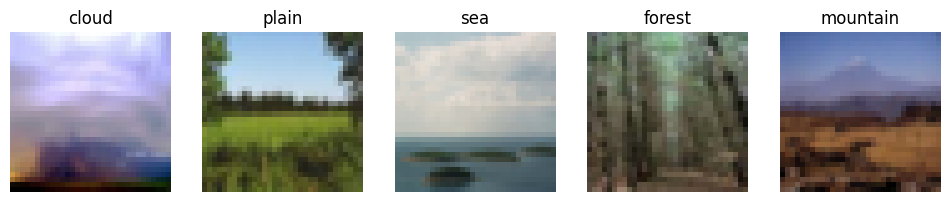

Superclass: large omnivores and herbivores


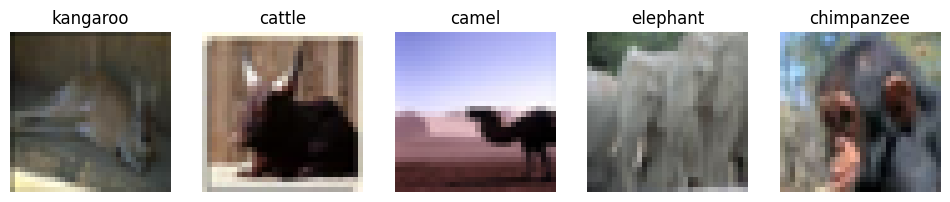

Superclass: medium-sized mammals


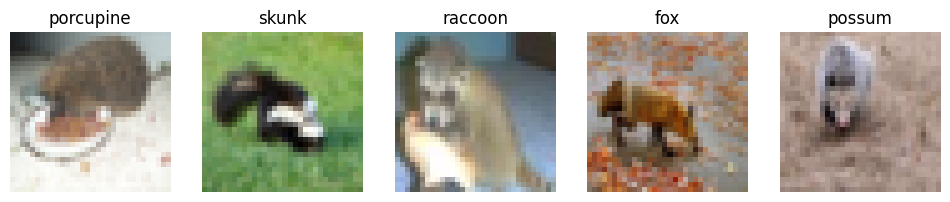

Superclass: non-insect invertebrates


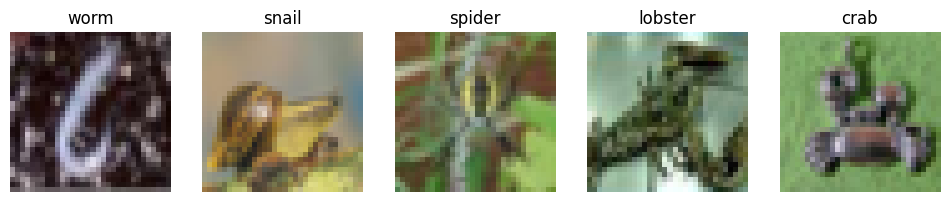

Superclass: people


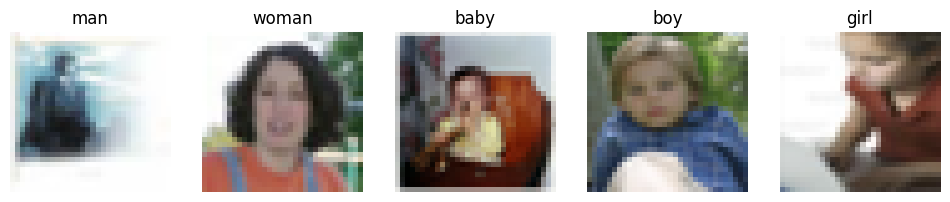

Superclass: reptiles


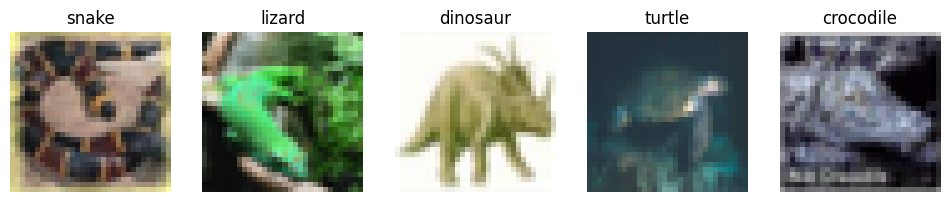

Superclass: small mammals


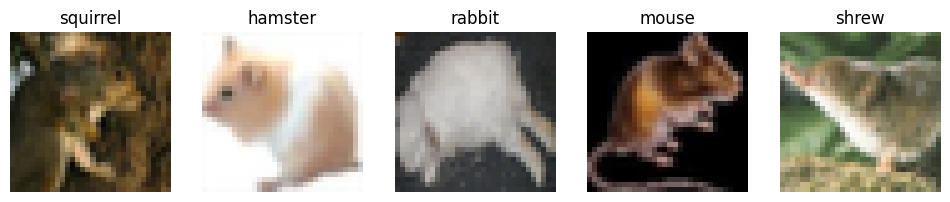

Superclass: trees


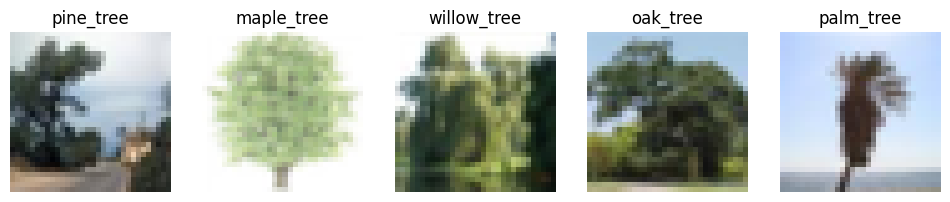

Superclass: vehicles 1


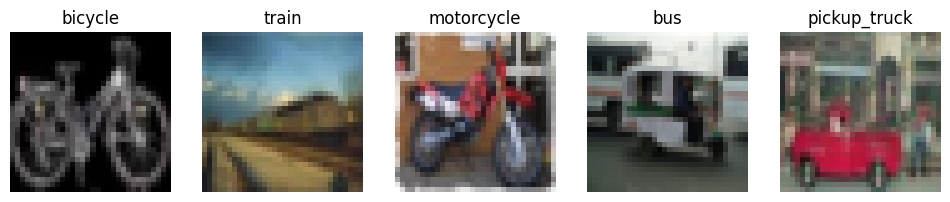

Superclass: vehicles 2


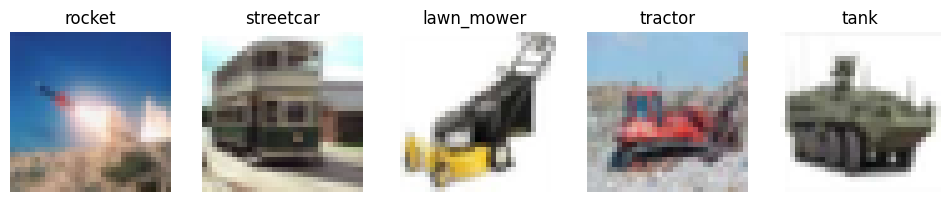

In [3]:
def print_images(images, labels, idx_to_class):
    fig, axes = plt.subplots(1, len(images), figsize=(12, 12))
    for img, label, ax in zip(images, labels, axes):
        # print(f"image.shape: {img.shape}")

        img = img[0] / 2 + 0.5
        img = img.numpy()
        img = np.transpose(img, (1, 2, 0))

        label = idx_to_class[label.item()]
        ax.imshow(img)
        ax.set_title(label)
        ax.axis('off')
    plt.show()

#visualize superclasses
def visualize_dataset(data_loader, superclass_to_indices, idx_to_class):
    torch.manual_seed(0)

    for superclass, indices in superclass_to_indices.items():
        classes = superclass_to_indices[superclass]
        classes = set(classes)

        print(f"Superclass: {superclass}")
        i = 0
        images = []
        labels = []
        for image, label in data_loader:
            for class_idx in indices:
                if label == class_idx and class_idx in classes:
                    images.append(image)
                    labels.append(label)
                    
                    classes.remove(class_idx)

                    if len(classes) == 0:
                        print_images(images, labels, idx_to_class)
                        break
            if len(classes) == 0:
                break


visualize_dataset(train_data_loader, superclass_to_indices, idx_to_class)


        
        

        
            

    

<a id="section-3"></a>
### **Section 3: TwoLayerNet Architecture (2 points)**

In this section, you will implement the architecture of a fully connected neural network called `TwoLayerNet`, consisting of two fully connected layers with a ReLU activation in between. The network accepts an input size of 3x32x32 (CIFAR-100 image), a specified hidden layer size, and the number of output classes. In the `__init__` method, define the first fully connected layer that maps the input size to the hidden size, and the second fully connected layer that maps the hidden size to the number of classes. 

Ensure to call the parent class constructor using `super(TwoLayerNet, self).__init__()`. In the `forward` method, flatten the input tensor, pass it through the first layer with ReLU activation, and then through the second layer to obtain the final scores.

**Note:** You are allowed to modify the provided function definitions as needed.

In [4]:
class TwoLayerNet(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        '''
        Initializes the two-layer neural network model.

        Args:
            input_size (int): The size of the input features.
            hidden_size (int): The size of the hidden layer.
            num_classes (int): The number of classes in the dataset.

        '''
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)



        # YOUR CODE HERE

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x
    
        # YOUR CODE HERE


<a id="section-4"></a>
### **Section 4: ConvNet Architecture (2 points)**

In this section, you will implement a convolutional neural network inspired by the structure of [LeNet-5](https://ieeexplore.ieee.org/document/726791). The network processes color images using three convolutional layers followed by two fully connected layers. Since you need to feed color images into this network, determine the kernel size of the first convolutional layer. Additionally, calculate the number of trainable parameters in the "F6" layer, providing the calculation process.

In [5]:
#find shape of 1 image 
for image, label in train_data_loader:
    print(f"image.shape: {image.shape}")
    print(f"label.shape: {label.shape}")
    print(f"min and max of image: {image.min()}, {image.max()}")
    print(f"min and max of label: {label.min()}, {label.max()}")
    break


image.shape: torch.Size([1, 3, 32, 32])
label.shape: torch.Size([1])
min and max of image: -0.9843137264251709, 0.8352941274642944
min and max of label: 14, 14


In [6]:
class ConvNet(nn.Module):

    def __init__(self):
        '''	
        Initializes the convolutional neural network model.

        Args:
            None
        '''

        # YOUR CODE HERE
        super(ConvNet, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.avg_pool1 = nn.AvgPool2d(2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.avg_pool2 = nn.AvgPool2d(2, stride=2)
        self.fc_conv = nn.Conv2d(16, 120, 5)
        self.fc1 = nn.Linear(120, 84)
        self.fc2 = nn.Linear(84, 100)


        
        
   


    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''


        # YOUR CODE HERE
        x = self.conv1(x)
        x = F.tanh(x)
        x = self.avg_pool1(x)
        x = F.tanh(x)
        x = self.conv2(x)
        x = F.tanh(x)
        x = self.avg_pool2(x)
        x = F.tanh(x)
        x = self.fc_conv(x)
        x = x.view(x.size(0), -1)
        x = F.tanh(x)
        x = self.fc1(x)
        x = F.tanh(x)
        x = self.fc2(x)

        
       
        return x
    

    


<a id="section-5"></a>
### **Section 5: Preparation of Training (7 points)**

In this section, you will create a custom dataset class to load the CIFAR-100 data, define a transform function for data augmentation, and set up an optimizer for training. While the previous section utilized the built-in CIFAR-100 class from `torchvision`, in practice, you often need to prepare datasets manually. Here, you will implement the `CIFAR100_loader` class to handle the dataset and use `DataLoader` to make it iterable. You will also define a transform function for data augmentation and an optimizer for updating the model's parameters.

In [7]:
def mean_std_dataset(set_loader_object):
    meanRGB=[np.mean(x.numpy(),axis=(1,2)) for x,_ in set_loader_object]
    stdRGB=[np.std(x.numpy(),axis=(1,2)) for x,_ in set_loader_object]

    meanR=np.mean([m[0] for m in meanRGB])
    meanG=np.mean([m[1] for m in meanRGB])
    meanB=np.mean([m[2] for m in meanRGB])

    stdR=np.mean([s[0] for s in stdRGB])
    stdG=np.mean([s[1] for s in stdRGB])
    stdB=np.mean([s[2] for s in stdRGB])

    stats = ((meanR, meanG, meanB), (stdR, stdG, stdB))

    return stats


In [8]:
class CIFAR100_loader(Dataset):
    
    def __init__(self, root, train=True, transform=None, download=False):
        '''
        Initializes the CIFAR-100 dataset loader.

        Args:
            root (str): The root directory to store the dataset.
            train (bool): If True, loads the training data; otherwise, loads the test data.
            transform (callable, optional): The data transformations to apply.
            download (bool): If True, downloads the dataset if it is not already available.
        '''
    
        # YOUR CODE HERE
        self.root = root
        self.train = train
        self.transform = transform
        self.download = download
        self.data = torchvision.datasets.CIFAR100(root=root, train=train, transform=transform, download=download)


    def __len__(self):
        '''
        Returns the number of samples in the dataset.

        Returns:
            int: The number of samples in the dataset.
        '''

        # YOUR CODE HERE
        return len(self.data)
    

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the image and label tensors.
        '''

        # YOUR CODE HERE
        return self.data[idx]
    

In [9]:
def create_transforms():
    '''
    Creates the data transformations for the CIFAR-100 dataset.

    Returns:
        torchvision.transforms.Compose: The data transformations for the dataset.
    '''

    # YOUR CODE HERE
    transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(stats[0], stats[1])
    ])
  


    return transform


In [10]:
def create_optimizer(model, learning_rate=0.001, method = 'Adam', weight_decay = 0):
    '''
    Creates an optimizer for the model.

    Args:
        model (torch.nn.Module): The neural network model.
        learning_rate (float): The learning rate for the optimizer.

    Returns:
        torch.optim.Adam: The optimizer for the model.
    '''

    # YOUR CODE HERE
    if method == 'Adam':
        return optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    if method == 'SGD':
        return torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    else:
        return None

<a id="section-6"></a>
### **Section 6: Training the Networks (5 points)**

In this section, you will complete the `train` function and use it to train both the `TwoLayerNet` and `ConvNet` models. You will use the custom `CIFAR100_loader`, transform function, and optimizer function that you implemented. The goal is to compare the performance of the two models on the CIFAR-100 dataset.

In [11]:
def validate(net, testloader):
    '''
    Validates the model on the test dataset.

    Args:
        net (torch.nn.Module): The neural network net.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.

    Returns:
        float: The accuracy of the net on the test dataset.
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net.to(device)
    correct, total = 0, 0

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the test images: {accuracy:.2f} %')

    return accuracy

In [12]:
def validate_per_class(net, testloader, classes):
    '''
    Validates the model on the test dataset per class.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.
        classes (tuple): The tuple of class names.

    Returns:
        None
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net.to(device)

    class_correct = [0. for _ in range(len(classes))]
    class_total = [0. for _ in range(len(classes))]

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions = (predicted == labels).squeeze()

            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += correct_predictions[i].item()
                class_total[label] += 1

    for i, class_name in enumerate(classes):
        accuracy = 100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0
        print(f'Accuracy of {class_name:5s} : {accuracy:.2f} %')

In [13]:
def train(net, train_loader, validation_loader, criterion, optimizer, model_name, epochs=100, verbose = True):
    '''
    Trains the neural network model.

    Args:
        net (torch.nn.Module): The neural network model.
        train_loader (torch.utils.data.DataLoader): The data loader for the training dataset.
        criterion (torch.nn.Module): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer for the model.
        epochs (int): The number of epochs to train the model.

    Returns:
        None
    '''

    # YOUR CODE HERE
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net.to(device)
    net.train()

    iters_per_epoch = len(train_loader)

    train_losses = []
    validation_losses = []
    
    #early stop settings

    lowest_validation_loss = float('inf')
    early_stop_timer = 3
    for epoch in range(epochs):
        running_loss = 0.0
        

        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = net(inputs)
            loss_train = criterion(outputs, labels)
            loss_train.backward()
            optimizer.step()

            running_loss += loss_train.item()
        running_loss /= iters_per_epoch
        
        with torch.no_grad():
            net.eval()
            # Iterate over the validation dataset
            for inputs, labels in validation_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = net(inputs)
                loss_val = criterion(outputs, labels)
        net.train()

        if verbose:
            print(f'Epoch {epoch + 1}, Training Loss: {running_loss:.3f}, Validation Loss: {loss_val:.3f}')
        
        #early stopping
        if loss_val < lowest_validation_loss:
                    lowest_validation_loss = loss_val
                    early_stop_timer = 3
                    #save model
                    torch.save(net.state_dict(), f'best_model_{model_name}.pth')
        else: 
            early_stop_timer -= 1
            if early_stop_timer == 0:
                print(f'Early stopping at epoch {epoch + 1}, with lowest validation loss of {lowest_validation_loss:.3f}')
                net.load_state_dict(torch.load(f'best_model_{model_name}.pth'))
                break        
            

        train_losses.append(running_loss)
        validation_losses.append(loss_val.item())

    if verbose:
        #plot the loss
        plt.plot(train_losses, label = "Training Loss")
        plt.plot(validation_losses, label = "Validation Loss")
        plt.title('Training and Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
    
    print('Finished Training')


  
    



First, initialize the datasets and data loaders for both models.

In [14]:
# YOUR CODE HERE

# Creating a stratified train-validation split:
indices = list(range(len(train_set)))
train_indices, val_indices = train_test_split(indices, test_size=0.2, random_state=random_seed, stratify=train_set.targets, shuffle=True)

train_subset = Subset(train_set, train_indices)
val_subset = Subset(train_set, val_indices)


training_data_loader = DataLoader(train_subset, batch_size=1024, shuffle=True)
validation_data_loader = DataLoader(val_subset, batch_size=1024, shuffle=False)
test_data_loader = DataLoader(test_set, batch_size=1024, shuffle=False)


Next, train the TwoLayerNet model on the CIFAR-100 dataset using the training data loader.

Epoch 1, Training Loss: 4.054, Validation Loss: 3.755
Epoch 2, Training Loss: 3.640, Validation Loss: 3.615
Epoch 3, Training Loss: 3.486, Validation Loss: 3.539
Epoch 4, Training Loss: 3.380, Validation Loss: 3.490
Epoch 5, Training Loss: 3.305, Validation Loss: 3.452
Epoch 6, Training Loss: 3.232, Validation Loss: 3.403
Epoch 7, Training Loss: 3.175, Validation Loss: 3.397
Epoch 8, Training Loss: 3.122, Validation Loss: 3.388
Epoch 9, Training Loss: 3.075, Validation Loss: 3.395
Epoch 10, Training Loss: 3.035, Validation Loss: 3.376
Epoch 11, Training Loss: 2.986, Validation Loss: 3.356
Epoch 12, Training Loss: 2.957, Validation Loss: 3.380
Epoch 13, Training Loss: 2.904, Validation Loss: 3.354
Epoch 14, Training Loss: 2.862, Validation Loss: 3.365
Epoch 15, Training Loss: 2.831, Validation Loss: 3.362
Epoch 16, Training Loss: 2.797, Validation Loss: 3.349
Epoch 17, Training Loss: 2.782, Validation Loss: 3.367
Epoch 18, Training Loss: 2.752, Validation Loss: 3.359
Epoch 19, Training 

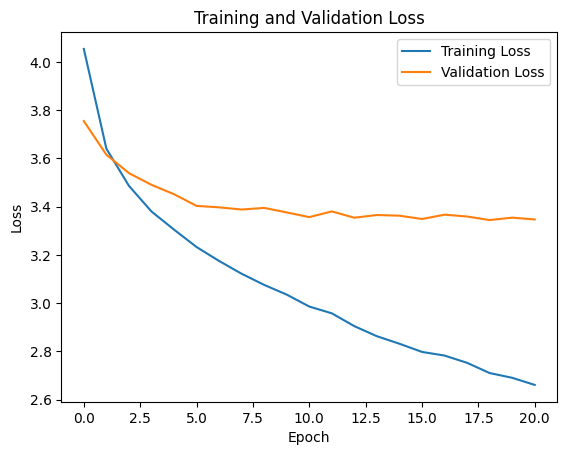

Finished Training
Accuracy of the network on the test images: 22.52 %


22.52

In [15]:
input_size = 3 * 32 * 32
hidden_size = 120
num_classes = 100


net = TwoLayerNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = create_optimizer(net, learning_rate=0.001)
model_name = "TwoLayerNet_baseline"

re_train = True

if not os.path.exists(f'./best_model_{model_name}.pth') or re_train:
    train(net, training_data_loader,validation_data_loader, criterion, optimizer,model_name, epochs=60)
else:
    net.load_state_dict(torch.load(f'best_model_{model_name}.pth'))
    
validate(net, test_data_loader)
#validate_per_class(net, test_data_loader, classes)





Finally, train the ConvNet model on the CIFAR-100 dataset using the training data loader.

Epoch 1, Training Loss: 4.429, Validation Loss: 4.211
Epoch 2, Training Loss: 4.105, Validation Loss: 4.002
Epoch 3, Training Loss: 3.952, Validation Loss: 3.892
Epoch 4, Training Loss: 3.844, Validation Loss: 3.813
Epoch 5, Training Loss: 3.764, Validation Loss: 3.757
Epoch 6, Training Loss: 3.692, Validation Loss: 3.693
Epoch 7, Training Loss: 3.635, Validation Loss: 3.659
Epoch 8, Training Loss: 3.580, Validation Loss: 3.619
Epoch 9, Training Loss: 3.519, Validation Loss: 3.577
Epoch 10, Training Loss: 3.483, Validation Loss: 3.554
Epoch 11, Training Loss: 3.444, Validation Loss: 3.508
Epoch 12, Training Loss: 3.392, Validation Loss: 3.487
Epoch 13, Training Loss: 3.364, Validation Loss: 3.473
Epoch 14, Training Loss: 3.331, Validation Loss: 3.442
Epoch 15, Training Loss: 3.300, Validation Loss: 3.429
Epoch 16, Training Loss: 3.268, Validation Loss: 3.410
Epoch 17, Training Loss: 3.243, Validation Loss: 3.414
Epoch 18, Training Loss: 3.213, Validation Loss: 3.384
Epoch 19, Training 

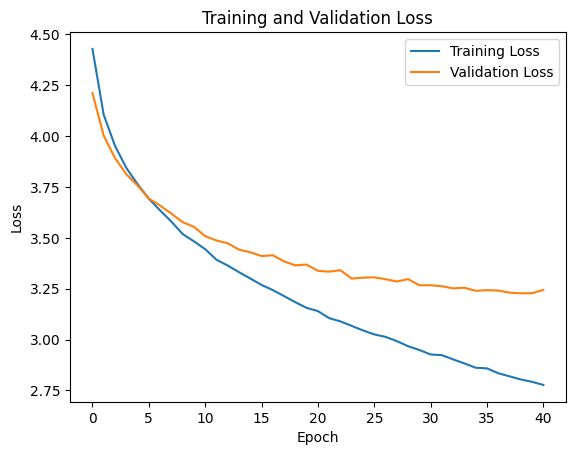

Finished Training
Accuracy of the network on the test images: 23.99 %


23.99

In [16]:
# YOUR CODE HERE

net = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = create_optimizer(net, learning_rate=0.001)
model_name = "ConvNet_baseline"

re_train = True

if not os.path.exists(f'./best_model_{model_name}.pth') or re_train:
    train(net, training_data_loader,validation_data_loader, criterion, optimizer,model_name, epochs=60)
else:
    net.load_state_dict(torch.load(f'best_model_{model_name}.pth'))

validate(net, test_data_loader)
#validate_per_class(net, test_data_loader, classes)




<a id="section-7"></a>
### **Section 7: Setting Up the Hyperparameters (14 points)**

In this section, you will experiment with both the `ConvNet` and `TwoLayerNet` models by setting up and tuning the hyperparameters to achieve the highest possible accuracy. You have the flexibility to modify the training process, including the `train` function, `DataLoader`, `transform` functions, and optimizer as needed.

1. Adjust the hyperparameters, including learning rate, batch size, number of epochs, optimizer, weight decay, and transform function to improve the performance of both networks. Modify the training procedure and architecture as necessary. You can also add components like Batch Normalization layers.
2. Add two more layers to both `TwoLayerNet` and `ConvNet`. You can decide the size and placement of these layers. Evaluate if these changes result in higher performance and explain your findings.
3. Show the final results and describe the modifications made to enhance performance. Discuss the impact of hyperparameter tuning on both `TwoLayerNet` and `ConvNet`.
4. Compare the two networks in terms of architecture, performance, and learning rates. Provide a detailed explanation of the differences observed.

**Note:** Do not use external pre-trained networks and limit additional convolutional layers to a maximum of three beyond the original architecture.

the hyperparameters, including learning rate, batch size, number of epochs, optimizer, weight decay, and transform function

In [18]:
import torchvision.transforms as transforms
# Hyper parameters we search through:
# Learning-rate
# Batch size
# number of epochs
# optimizer
# weight decay
# transform function

transform_functions = ['base', 'data_augmentation']
optimizers = ['Adam', 'SGD']
weight_decays = [0, 0.01, 0.001]
learning_rates = [0.001, 0.002, 0.0005]
batch_sizes = [1024,512,256]
max_number_of_epochs = [60,45,30,15]



base_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5071, 0.4867, 0.4408), std=(0.2675, 0.2565, 0.2761))
])
augmentation_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),         
    transforms.RandomRotation(20),                  
    transforms.RandomResizedCrop(size=32, scale=(0.8, 1.0)),  
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


In [19]:
# Data loaders using the different transforms:
train_set_base_transform = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=base_transform)
train_set_augment_transform = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=augmentation_transform)
test_set_base_transform = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=base_transform)

data_base = (Subset(train_set_base_transform, train_indices), Subset(train_set_base_transform, val_indices))
data_augment = (Subset(train_set_augment_transform,train_indices), Subset(train_set_augment_transform,val_indices))

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [17]:
from sklearn.model_selection import ParameterSampler
from tqdm import tqdm

# first set of hyperparameters to tune
params = {
    'transform_functions' : ['base', 'data_augmentation'],
    'optimizers' : ['Adam', 'SGD'],
    'weight_decays' : [0, 0.01, 0.001],
    'learning_rates' : [0.001, 0.002, 0.0005],
    'batch_sizes' : [1024,512,256],
    'max_number_of_epochs' : [60,45,30,15]
}

input_size = 3 * 32 * 32
hidden_size = 120
num_classes = 100
net1 = TwoLayerNet(input_size, hidden_size, num_classes)
net2 = ConvNet()

# track best mAP scores
best_net_accs = np.array([0.0,0.0])

# store params with best mAP
best_net_params = [None,None]

# sample random hyperparameter combinations
n_iters = 12 # number of combinations
param_samples = ParameterSampler(params, n_iter=n_iters, random_state=random_seed)

# search for best params
for sample in tqdm(param_samples, total=n_iters, desc=f'Tuning keypoints, training data split, and vocab sizes'):
	nets = [net1, net2]
	for i,net in enumerate(nets):

		if sample['transform_functions'] == 'base':
			training_data_loader = DataLoader(data_base[0], batch_size=batch_sizes[0], shuffle=True)
			validation_data_loader = DataLoader(data_base[1], batch_size=batch_sizes[0], shuffle=False)
		if sample['transform_functions'] == 'data_augmentation':
			training_data_loader = DataLoader(data_augment[0], batch_size=batch_sizes[0], shuffle=True)
			validation_data_loader = DataLoader(data_augment[1], batch_size=batch_sizes[0], shuffle=False)
		
		criterion = nn.CrossEntropyLoss()
		optimizer = create_optimizer(net, learning_rate=sample['learning_rates'], method=sample['optimizers'],weight_decay=sample['weight_decays'])
		
		train(net, training_data_loader,validation_data_loader, criterion, optimizer,'', epochs=sample['max_number_of_epochs'], verbose=False)
		val_acc = validate(net, validation_data_loader)
		if val_acc > best_net_accs[i]:
			best_net_accs[i] = val_acc
			best_net_params[i] = {
    'transform_functions' : sample['transform_functions'],
    'optimizers' : sample['optimizers'],
    'weight_decays' : sample['weight_decays'],
    'learning_rates' : sample['learning_rates'],
    'batch_sizes' : sample['batch_sizes'],
    'max_number_of_epochs' : sample['max_number_of_epochs']
}
print('done searching: hyperparam set')


print('\n************* 2LayerFC *****************')
print(f'Best Params: \n{best_net_params[0]}')
print(f'\n Best Accuracy: {best_net_accs[0]}')


print('\n************** CONV *****************')
print(f'Best Params: \n{best_net_params[1]}')
print(f'\n Best Accuracy: {best_net_accs[1]}')

Tuning keypoints, training data split, and vocab sizes:   0%|          | 0/12 [00:00<?, ?it/s]

Finished Training
Accuracy of the network on the test images: 14.90 %
Finished Training


Tuning keypoints, training data split, and vocab sizes:   8%|▊         | 1/12 [17:34<3:13:20, 1054.59s/it]

Accuracy of the network on the test images: 7.54 %
Early stopping at epoch 13, with lowest validation loss of 3.479
Finished Training
Accuracy of the network on the test images: 19.61 %
Early stopping at epoch 22, with lowest validation loss of 3.433
Finished Training


Tuning keypoints, training data split, and vocab sizes:  17%|█▋        | 2/12 [40:30<3:27:13, 1243.36s/it]

Accuracy of the network on the test images: 17.57 %
Early stopping at epoch 6, with lowest validation loss of 3.243
Finished Training
Accuracy of the network on the test images: 24.82 %
Early stopping at epoch 15, with lowest validation loss of 3.203
Finished Training


Tuning keypoints, training data split, and vocab sizes:  25%|██▌       | 3/12 [44:14<1:56:43, 778.17s/it] 

Accuracy of the network on the test images: 23.47 %
Finished Training
Accuracy of the network on the test images: 25.36 %
Early stopping at epoch 6, with lowest validation loss of 3.202
Finished Training


Tuning keypoints, training data split, and vocab sizes:  33%|███▎      | 4/12 [49:22<1:19:00, 592.51s/it]

Accuracy of the network on the test images: 23.79 %
Early stopping at epoch 8, with lowest validation loss of 3.210
Finished Training
Accuracy of the network on the test images: 25.27 %
Early stopping at epoch 11, with lowest validation loss of 3.200
Finished Training


Tuning keypoints, training data split, and vocab sizes:  42%|████▏     | 5/12 [52:23<51:48, 444.08s/it]  

Accuracy of the network on the test images: 23.81 %
Early stopping at epoch 13, with lowest validation loss of 3.505
Finished Training
Accuracy of the network on the test images: 18.62 %
Early stopping at epoch 11, with lowest validation loss of 3.421
Finished Training


Tuning keypoints, training data split, and vocab sizes:  50%|█████     | 6/12 [1:08:03<1:01:16, 612.71s/it]

Accuracy of the network on the test images: 18.55 %
Early stopping at epoch 30, with lowest validation loss of 3.209
Finished Training
Accuracy of the network on the test images: 25.36 %
Early stopping at epoch 22, with lowest validation loss of 3.199
Finished Training


Tuning keypoints, training data split, and vocab sizes:  58%|█████▊    | 7/12 [1:19:06<52:26, 629.21s/it]  

Accuracy of the network on the test images: 23.92 %
Early stopping at epoch 12, with lowest validation loss of 3.449
Finished Training
Accuracy of the network on the test images: 19.68 %
Early stopping at epoch 8, with lowest validation loss of 3.399
Finished Training


Tuning keypoints, training data split, and vocab sizes:  67%|██████▋   | 8/12 [1:33:54<47:25, 711.43s/it]

Accuracy of the network on the test images: 18.69 %
Early stopping at epoch 5, with lowest validation loss of 3.432
Finished Training
Accuracy of the network on the test images: 19.68 %
Early stopping at epoch 15, with lowest validation loss of 3.274
Finished Training


Tuning keypoints, training data split, and vocab sizes:  75%|███████▌  | 9/12 [1:46:36<36:22, 727.44s/it]

Accuracy of the network on the test images: 20.97 %
Early stopping at epoch 4, with lowest validation loss of 3.433
Finished Training
Accuracy of the network on the test images: 20.05 %
Early stopping at epoch 4, with lowest validation loss of 3.313
Finished Training


Tuning keypoints, training data split, and vocab sizes:  83%|████████▎ | 10/12 [1:51:34<19:49, 594.65s/it]

Accuracy of the network on the test images: 21.36 %
Early stopping at epoch 8, with lowest validation loss of 3.407
Finished Training
Accuracy of the network on the test images: 20.67 %
Early stopping at epoch 6, with lowest validation loss of 3.260
Finished Training


Tuning keypoints, training data split, and vocab sizes:  92%|█████████▏| 11/12 [1:59:46<09:23, 563.45s/it]

Accuracy of the network on the test images: 21.20 %
Early stopping at epoch 7, with lowest validation loss of 3.382
Finished Training
Accuracy of the network on the test images: 20.29 %
Early stopping at epoch 5, with lowest validation loss of 3.270
Finished Training


Tuning keypoints, training data split, and vocab sizes: 100%|██████████| 12/12 [2:07:13<00:00, 636.13s/it]

Accuracy of the network on the test images: 21.77 %
done searching: hyperparam set

************* 2LayerFC *****************
Best Params: 
{'transform_functions': 'base', 'optimizers': 'SGD', 'weight_decays': 0, 'learning_rates': 0.001, 'batch_sizes': 1024, 'max_number_of_epochs': 30}

 Best Accuracy: 25.36

************** CONV *****************
Best Params: 
{'transform_functions': 'base', 'optimizers': 'SGD', 'weight_decays': 0, 'learning_rates': 0.0005, 'batch_sizes': 256, 'max_number_of_epochs': 30}

 Best Accuracy: 23.92


7.2 add layers

In [37]:
class TwoLayerNet(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        '''
        Initializes the two-layer neural network model.

        Args:
            input_size (int): The size of the input features.
            hidden_size (int): The size of the hidden layer.
            num_classes (int): The number of classes in the dataset.

        '''
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 140)
        self.fc2 = nn.Linear(140, 140)
        self.fc3 = nn.Linear(140, hidden_size)
        self.fc4 = nn.Linear(hidden_size, num_classes)

        # YOUR CODE HERE

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        
        return x
    
    
        # YOUR CODE HERE


class ConvNet(nn.Module):

    def __init__(self):
        '''	
        Initializes the convolutional neural network model.

        Args:
            None
        '''

        super(ConvNet, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.avg_pool1 = nn.AvgPool2d(2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.avg_pool2 = nn.AvgPool2d(2, stride=2)
        
        self.conv3 = nn.Conv2d(16, 32, 3)
        self.conv4 = nn.Conv2d(32, 120, 3)
        
        self.fc1 = nn.Linear(120, 84)
        self.fc2 = nn.Linear(84, 100)
    
        self.bn1 = nn.BatchNorm2d(6)
        self.bn2 = nn.BatchNorm2d(16)
        self.bn3 = nn.BatchNorm2d(32)
        self.bn4 = nn.BatchNorm2d(120)
    
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.avg_pool1(x)
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.avg_pool2(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    


************* 2LayerFC *****************
Best Params: 
{'transform_functions': 'base', 'optimizers': 'SGD', 'weight_decays': 0, 'learning_rates': 0.001, 'batch_sizes': 1024, 'max_number_of_epochs': 30}

 Best Accuracy: 25.36

************** CONV *****************
Best Params: 
{'transform_functions': 'base', 'optimizers': 'SGD', 'weight_decays': 0, 'learning_rates': 0.0005, 'batch_sizes': 256, 'max_number_of_epochs': 30}

 Best Accuracy: 23.92

In [40]:
# Define the optimizer creation function
def create_optimizer(model, learning_rate):
    return optim.SGD(model.parameters(), lr=learning_rate)

# Creating a stratified train-validation split
random_seed = 42
indices = list(range(len(train_set)))
train_indices, val_indices = train_test_split(
    indices, test_size=0.2, random_state=random_seed, stratify=train_set.targets, shuffle=True
)

train_subset = Subset(train_set, train_indices)
val_subset = Subset(train_set, val_indices)

# Data loaders with batch size 1024 for ConvNet_2layernet_extra
training_data_loader = DataLoader(train_subset, batch_size=1024, shuffle=True)
validation_data_loader = DataLoader(val_subset, batch_size=1024, shuffle=False)
test_data_loader = DataLoader(test_set, batch_size=1024, shuffle=False)

Epoch 1, Training Loss: 4.607, Validation Loss: 4.608
Epoch 2, Training Loss: 4.607, Validation Loss: 4.608
Epoch 3, Training Loss: 4.607, Validation Loss: 4.607
Epoch 4, Training Loss: 4.607, Validation Loss: 4.607
Epoch 5, Training Loss: 4.607, Validation Loss: 4.607
Epoch 6, Training Loss: 4.607, Validation Loss: 4.607
Epoch 7, Training Loss: 4.606, Validation Loss: 4.607
Epoch 8, Training Loss: 4.606, Validation Loss: 4.607
Epoch 9, Training Loss: 4.607, Validation Loss: 4.607
Epoch 10, Training Loss: 4.606, Validation Loss: 4.607
Epoch 11, Training Loss: 4.606, Validation Loss: 4.607
Epoch 12, Training Loss: 4.607, Validation Loss: 4.607
Epoch 13, Training Loss: 4.606, Validation Loss: 4.606
Epoch 14, Training Loss: 4.606, Validation Loss: 4.606
Epoch 15, Training Loss: 4.606, Validation Loss: 4.606
Epoch 16, Training Loss: 4.606, Validation Loss: 4.606
Epoch 17, Training Loss: 4.606, Validation Loss: 4.606
Epoch 18, Training Loss: 4.606, Validation Loss: 4.606
Epoch 19, Training 

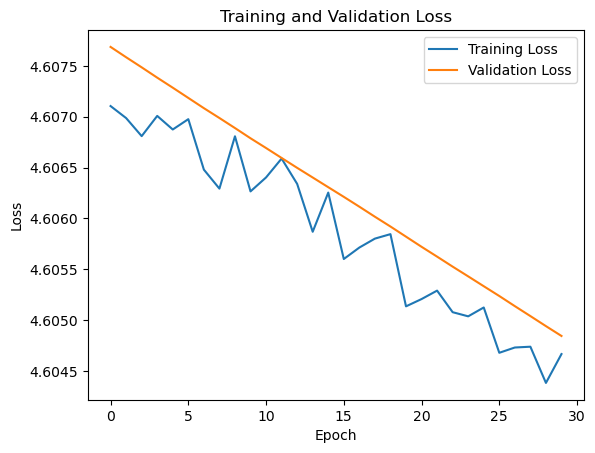

Finished Training
Accuracy of the network on the test images: 1.08 %


1.08

In [41]:
input_size = 3 * 32 * 32
hidden_size = 120
num_classes = 100



# Model setup for ConvNet_2layernet_extra
net = TwoLayerNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = create_optimizer(net, learning_rate=0.001)  # Learning rate: 0.001
model_name = "ConvNet_2layernet_extra"

# Retraining flag
re_train = True

# Check if the best model exists; if not or if retraining, train the model
if not os.path.exists(f'./best_model_{model_name}.pth') or re_train:
    train(net, training_data_loader, validation_data_loader, criterion, optimizer, model_name, epochs=30)
else:
    net.load_state_dict(torch.load(f'./best_model_{model_name}.pth'))

# Validate the model
validate(net, validation_data_loader)

In [38]:
training_data_loader = DataLoader(train_subset, batch_size=256, shuffle=True)
validation_data_loader = DataLoader(val_subset, batch_size=256, shuffle=False)
test_data_loader = DataLoader(test_set, batch_size=256, shuffle=False)

Epoch 1, Training Loss: 4.615, Validation Loss: 4.669
Epoch 2, Training Loss: 4.612, Validation Loss: 4.658
Epoch 3, Training Loss: 4.608, Validation Loss: 4.643
Epoch 4, Training Loss: 4.604, Validation Loss: 4.630
Epoch 5, Training Loss: 4.601, Validation Loss: 4.614
Epoch 6, Training Loss: 4.598, Validation Loss: 4.609
Epoch 7, Training Loss: 4.595, Validation Loss: 4.601
Epoch 8, Training Loss: 4.592, Validation Loss: 4.589
Epoch 9, Training Loss: 4.588, Validation Loss: 4.581
Epoch 10, Training Loss: 4.586, Validation Loss: 4.575
Epoch 11, Training Loss: 4.583, Validation Loss: 4.563
Epoch 12, Training Loss: 4.580, Validation Loss: 4.559
Epoch 13, Training Loss: 4.576, Validation Loss: 4.553
Epoch 14, Training Loss: 4.574, Validation Loss: 4.547
Epoch 15, Training Loss: 4.571, Validation Loss: 4.542
Epoch 16, Training Loss: 4.568, Validation Loss: 4.524
Epoch 17, Training Loss: 4.565, Validation Loss: 4.524
Epoch 18, Training Loss: 4.562, Validation Loss: 4.516
Epoch 19, Training 

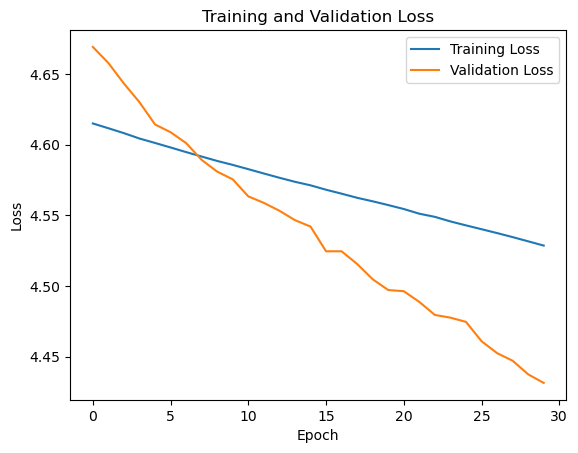

Finished Training
Accuracy of the network on the test images: 3.20 %


3.2

In [39]:
net = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = create_optimizer(net, learning_rate=0.0005)
model_name = "ConvNet_conv_extra"

# Retraining flag
re_train = True

if not os.path.exists(f'./best_model_{model_name}.pth') or re_train:
    train(net, training_data_loader, validation_data_loader, criterion, optimizer, model_name, epochs=30) 
else:
    net.load_state_dict(torch.load(f'best_model_{model_name}.pth'))

validate(net, validation_data_loader)

<a id="section-8"></a>
### **Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)**

In this section, you will work with a subset of the [STL-10](https://cs.stanford.edu/~acoates/stl10/) dataset, containing higher resolution images and different object classes than CIFAR-100. Before fine-tuning your ConvNet on this dataset, first complete the `visualise_stl10` function to display sample images from the following 5 classes:

1. **Bird**
2. **Deer**
3. **Dog**
4. **Horse**
5. **Monkey**

In [9]:
class STL10_loader(Dataset):
    def __init__(self, root, train=True, transform=None):
        '''
        Initializes the STL10 dataset, filtering it to include only 5 classes.

        Args:
            root (str): Root directory of the dataset.
            train (bool): If True, use the training set, otherwise use the test set.
            transform (callable, optional): A function/transform to apply to the images.
        '''
        self.root = root
        self.train = train
        self.transform = transform 
        
        # Define the classes we are interested in
        self.class_mapping = {1: 0, 4: 1, 5: 2, 6: 3, 7: 4} 
        self.selected_original_labels = list(self.class_mapping.keys())
        
        # Load the STL10 dataset
        full_data = torchvision.datasets.STL10(
            root=root,
            split='train' if train else 'test',
            transform=transform,
            download=True
        )
        self.data = []
        self.labels = []
        for img, label in full_data:
            if label in self.class_mapping:
                self.data.append(img)
                self.labels.append(self.class_mapping[label])
    
        print(f'Loaded {"training" if train else "test"} dataset with {len(self.data)} samples.')

    
    def __len__(self):
        '''
        Returns the number of samples in the dataset.
        '''
        return len(self.data)
    
    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the transformed image and its target label.
        '''
        img = self.data[idx]
        label = self.labels[idx]
        return img, label
    
#load the stl10 dataset and create the data loaders train and test, name appropriately

set_for_stats = STL10_loader(root='./data', train=True, transform=transforms.ToTensor())
stats = mean_std_dataset(set_for_stats)

transform_STL = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(stats[0], stats[1])
])

train_set_stl_10 = STL10_loader(root='./data', train=True, transform=transform_STL)
test_set_stl_10 = STL10_loader(root='./data', train=False, transform=transform_STL)

train_data_loader_stl_10 = DataLoader(train_set_stl_10, shuffle=True)
test_data_loader_stl_10 = DataLoader(test_set_stl_10, shuffle=False)



Files already downloaded and verified
Loaded training dataset with 2500 samples.
Files already downloaded and verified
Loaded training dataset with 2500 samples.
Files already downloaded and verified
Loaded test dataset with 4000 samples.


In [11]:
def visualise_stl10(stats, reverse_class_mapping, data_loader, images_per_class=3, ):
    '''
    Visualizes a specified number of images from each class in the STL-10 dataset.

    Args:
        reverse_class_mapping (dict): A dictionary mapping new class indices to class names.
        data_loader (DataLoader): The DataLoader for the STL-10 dataset.
        images_per_class (int): Number of images to display per class.
    '''
    torch.manual_seed(0)

    images = {cls: [] for cls in reverse_class_mapping.keys()}
    labels = {cls: [] for cls in reverse_class_mapping.keys()}

    for batch_images, batch_labels in data_loader:
        for image, label in zip(batch_images, batch_labels):
            label = label.item()  # Convert to scalar

            if label in images and len(images[label]) < images_per_class:
                images[label].append(image)
                labels[label].append(label)

        # If we've collected enough images for all classes, break out of the loop
        if all(len(imgs) == images_per_class for imgs in images.values()):
            break

    # Flatten the images and labels for visualization
    flat_images = []
    flat_labels = []
    for cls in images:
        flat_images.extend(images[cls])
        flat_labels.extend(labels[cls])

    print_images_stl10(stats, flat_images, flat_labels, reverse_class_mapping, num_images_per_class=images_per_class)


def print_images_stl10(stats, images, labels, idx_to_class, num_images_per_class):
    num_classes = len(set(labels))
    total_images = num_classes * num_images_per_class

    fig, axes = plt.subplots(num_classes, num_images_per_class, figsize=(12, 12))
    axes = axes.flatten()

    mean = np.array(stats[0])[:, np.newaxis, np.newaxis]
    std = np.array(stats[1])[:, np.newaxis, np.newaxis]

    for i, (img, label, ax) in enumerate(zip(images, labels, axes)):
        img = img.numpy()
        img = img * std + mean  # Proper unnormalization
        img = np.clip(img, 0, 1)  # Ensure values are within [0, 1]
        img = np.transpose(img, (1, 2, 0))  # Convert to [H, W, C]

        label_name = idx_to_class[label]
        ax.imshow(img)
        ax.set_title(label_name)
        ax.axis('off')

    plt.tight_layout()
    plt.show()



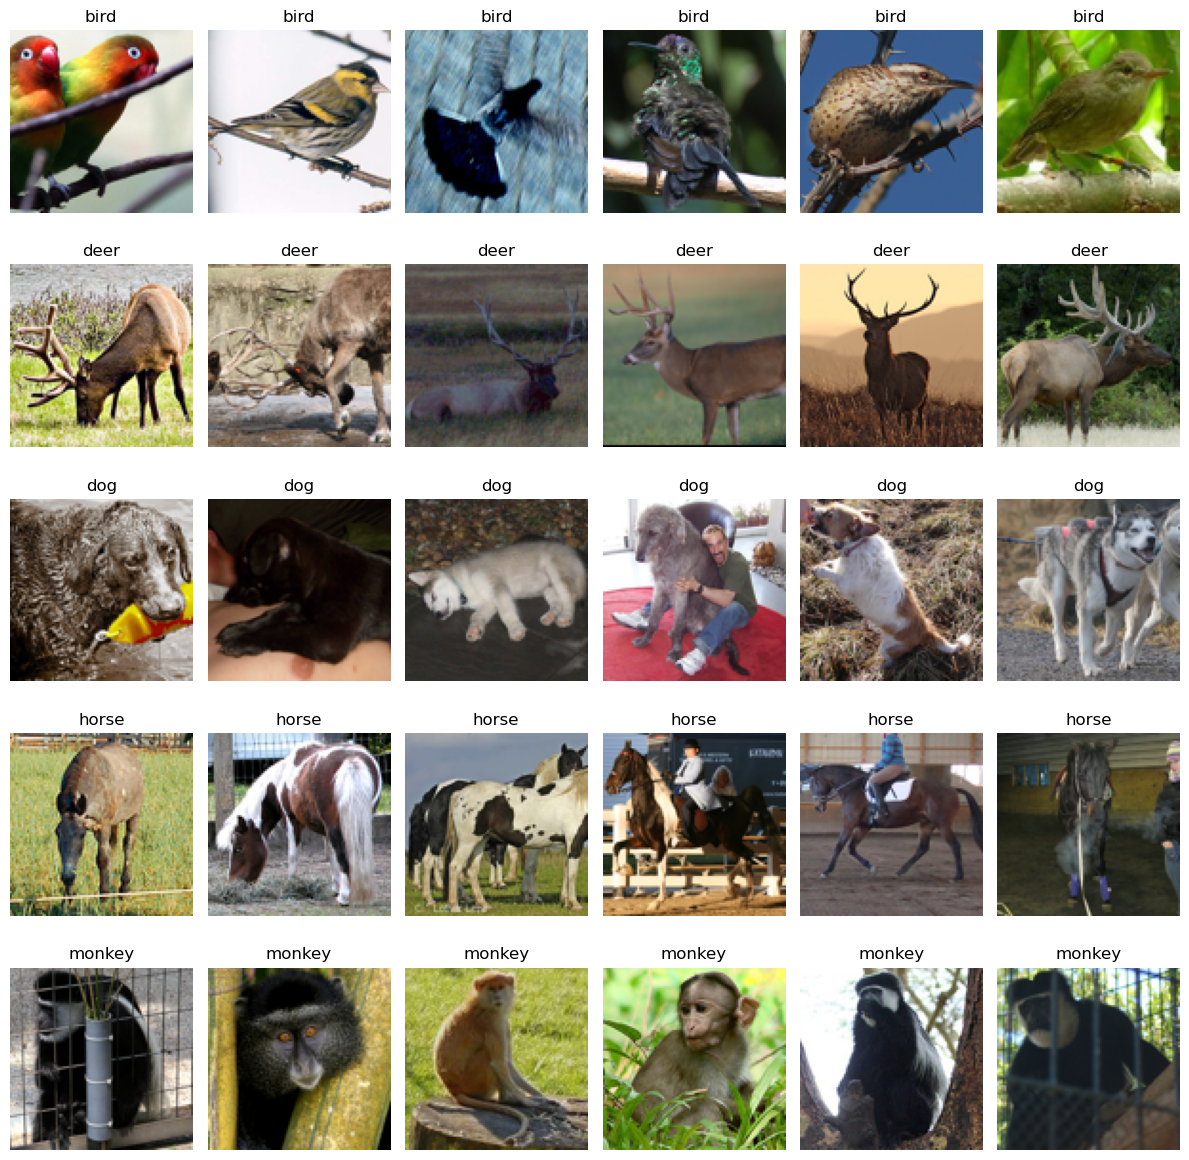

In [10]:
# Define the reverse class mapping: new label -> class name
reverse_class_mapping = {0: 'bird', 1: 'deer', 2: 'dog', 3: 'horse', 4: 'monkey'}

# Visualize STL-10 classes
visualise_stl10(stats, reverse_class_mapping, train_data_loader_stl_10, images_per_class=6)


After visualizing the data, implement the `STL10_loader` class to create a custom data loader that initializes the dataset, extracts the target classes, and applies the necessary image transformations. Once these tasks are completed, you will move on to fine-tuning the ConvNet on this dataset in the next section.

<a id="section-9"></a>
### **Section 9: Fine-tuning ConvNet on STL-10 (14 points)**

In this section, you will load the pre-trained parameters of the ConvNet (trained on CIFAR-100) and modify the output layer to adapt it to the new dataset containing 5 classes. You can either first load the pre-trained parameters and then modify the output layer, or change the output layer before loading the matched pre-trained parameters. Once modified, you will train the model and document the settings of hyperparameters, accuracy, and learning curve. Additionally, visualize both the training loss and accuracy to assess the learning process. To gain a deeper understanding of the feature learning process, consider using techniques like [**t-sne**](https://lvdmaaten.github.io/tsne/) for feature space visualization.

In [76]:
class ConvNet(nn.Module):

    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.avg_pool1 = nn.AvgPool2d(2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.avg_pool2 = nn.AvgPool2d(2, stride=2)
        self.adaptive_pool = nn.AdaptiveAvgPool2d((5, 5)) #as said on ed
        self.fc_conv = nn.Conv2d(16, 120, 5)
        self.fc1 = nn.Linear(120, 84)
        self.fc2 = nn.Linear(84, 5) #5 classes instead of 100

    def forward(self, x):
        x = self.conv1(x)
        x = F.tanh(x)
        x = self.avg_pool1(x)
        x = F.tanh(x)
        x = self.conv2(x)
        x = F.tanh(x)
        x = self.avg_pool2(x)
        x = F.tanh(x)
        x = self.adaptive_pool(x)
        x = self.fc_conv(x)
        x = F.tanh(x)
        x = x.view(x.size(0), -1) 
        x = F.tanh(x)
        x = self.fc1(x)
        x = F.tanh(x)
        features = x  # Extract features before the final layer
        x = self.fc2(x)
        return x, features


In [81]:
# Initialize the modified net
net = ConvNet()

# Load the pre-trained state dictionary
pretrained_dict = torch.load('best_model_ConvNet_baseline.pth')

net_dict = net.state_dict()

pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in net_dict and v.size() == net_dict[k].size()} #removes last layer 95 weights

# Update the current net's state dictionary
net_dict.update(pretrained_dict)

# Load the updated state dictionary into the net
net.load_state_dict(net_dict)




C:\Users\jesse\AppData\Local\Temp\ipykernel_16352\595869436.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_dict = torch.load('best_model_ConvNet_baseline.pth

<All keys matched successfully>

In [102]:
def train_stl(net, train_loader, validation_loader, criterion, optimizer, model_name, epochs=100, verbose = True):
    '''
    Trains the neural network model.

    Args:
        net (torch.nn.Module): The neural network model.
        train_loader (torch.utils.data.DataLoader): The data loader for the training dataset.
        criterion (torch.nn.Module): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer for the model.
        epochs (int): The number of epochs to train the model.

    Returns:
        None
    '''

    # YOUR CODE HERE
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net.to(device)
    net.train()

    iters_per_epoch = len(train_loader)

    train_losses = []
    validation_losses = []
    
    #early stop settings

    lowest_validation_loss = float('inf')
    for epoch in range(epochs):
        running_loss = 0.0
        

        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs, _ = net(inputs)
            loss_train = criterion(outputs, labels)
            loss_train.backward()
            optimizer.step()

            running_loss += loss_train.item()
        running_loss /= iters_per_epoch
        
        with torch.no_grad():
            net.eval()
            # Iterate over the validation dataset
            for inputs, labels in validation_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs, _ = net(inputs)
                loss_val = criterion(outputs, labels)
        net.train()

        if verbose:
            print(f'Epoch {epoch + 1}, Training Loss: {running_loss:.3f}, Validation Loss: {loss_val:.3f}')
        
        #early stopping
        if loss_val < lowest_validation_loss:
                    lowest_validation_loss = loss_val
                    early_stop_timer = 20
                    #save model
                    torch.save(net.state_dict(), f'best_model_{model_name}.pth')
        else: 
            early_stop_timer -= 1
            if early_stop_timer == 0:
                print(f'Early stopping at epoch {epoch + 1}, with lowest validation loss of {lowest_validation_loss:.3f}')
                net.load_state_dict(torch.load(f'best_model_{model_name}.pth'))
                break        
            

        train_losses.append(running_loss)
        validation_losses.append(loss_val.item())

    if verbose:
        #plot the loss
        plt.plot(train_losses, label = "Training Loss")
        plt.plot(validation_losses, label = "Validation Loss")
        plt.title('Training and Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
    
    print('Finished Training')


def validate_stl(net, testloader):
    '''
    Validates the model on the test dataset.

    Args:
        net (torch.nn.Module): The neural network net.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.

    Returns:
        float: The accuracy of the net on the test dataset.
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net.to(device)
    correct, total = 0, 0

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs, _ = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the test images: {accuracy:.2f} %')

    return accuracy   

Epoch 1, Training Loss: 1.492, Validation Loss: 1.566
Epoch 2, Training Loss: 1.487, Validation Loss: 1.566
Epoch 3, Training Loss: 1.486, Validation Loss: 1.566
Epoch 4, Training Loss: 1.481, Validation Loss: 1.565
Epoch 5, Training Loss: 1.486, Validation Loss: 1.564
Epoch 6, Training Loss: 1.486, Validation Loss: 1.566
Epoch 7, Training Loss: 1.480, Validation Loss: 1.566
Epoch 8, Training Loss: 1.483, Validation Loss: 1.567
Epoch 9, Training Loss: 1.483, Validation Loss: 1.567
Epoch 10, Training Loss: 1.482, Validation Loss: 1.567
Epoch 11, Training Loss: 1.480, Validation Loss: 1.566
Epoch 12, Training Loss: 1.483, Validation Loss: 1.566
Epoch 13, Training Loss: 1.487, Validation Loss: 1.563
Epoch 14, Training Loss: 1.484, Validation Loss: 1.564
Epoch 15, Training Loss: 1.479, Validation Loss: 1.562
Epoch 16, Training Loss: 1.477, Validation Loss: 1.563
Epoch 17, Training Loss: 1.473, Validation Loss: 1.563
Epoch 18, Training Loss: 1.479, Validation Loss: 1.563
Epoch 19, Training 

C:\Users\jesse\AppData\Local\Temp\ipykernel_16352\3870069445.py:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(f'best_model_{model_name}.pt

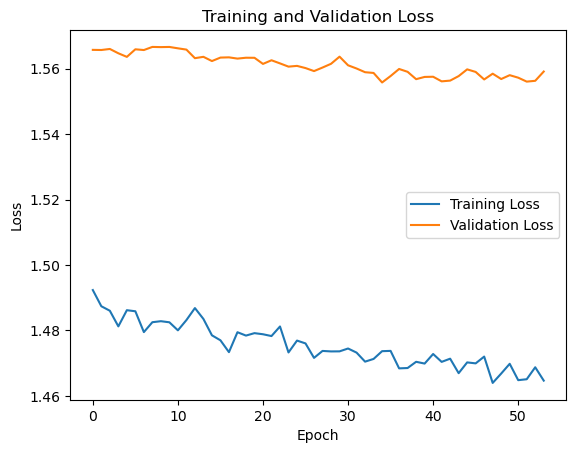

Finished Training
Accuracy of the network on the test images: 36.45 %


36.45

In [103]:
#model settings

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net.to(device)

optimizer = torch.optim.SGD(net.parameters(), lr=0.0005, weight_decay=0) # I thought some reduced settings s.a. lower learning rate since we are fine tuning
criterion = nn.CrossEntropyLoss()
num_epochs = 15

model_name = 'stl10_finetuned'

# Creating a stratified train-validation split:

indices = list(range(len(train_set_stl_10)))
train_indices, val_indices = train_test_split(indices, test_size=0.2, random_state=random_seed, stratify=train_set_stl_10.labels, shuffle=True)

train_subset_stl_10 = Subset(train_set, train_indices)
val_subset_stl_10 = Subset(train_set, val_indices)


train_subset_stl_10 = Subset(train_set_stl_10, train_indices)
val_subset_stl_10 = Subset(train_set_stl_10, val_indices)

train_data_loader_stl_10 = DataLoader(train_subset_stl_10, batch_size=64, shuffle=True)
validation_data_loader_stl_10 = DataLoader(val_subset_stl_10, batch_size=64, shuffle=False)
test_data_loader_stl_10 = DataLoader(test_set_stl_10, batch_size=64, shuffle=False)



# Training and validation
re_train = True

if not os.path.exists(f'./best_model_{model_name}.pth') or re_train:
    train_stl(net, train_data_loader_stl_10, validation_data_loader_stl_10, criterion, model_name=model_name, optimizer=optimizer, epochs=200)
else:
    net.load_state_dict(torch.load(f'best_model_{model_name}.pth'))

# Validate the model on the test set
validate_stl(net, test_data_loader_stl_10)

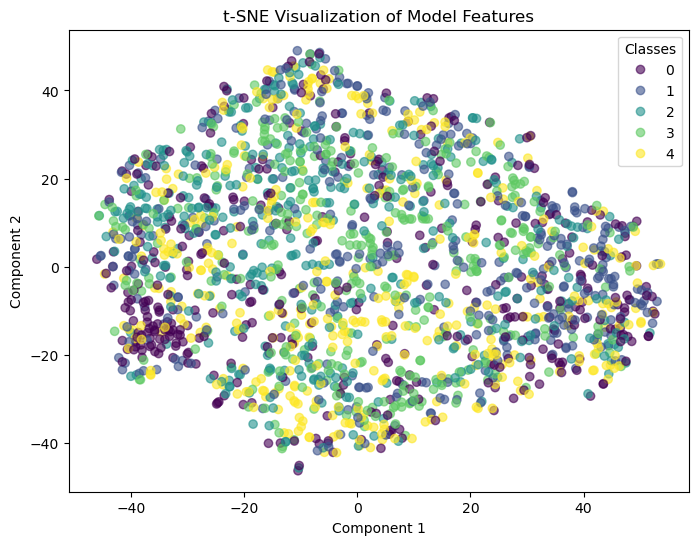

In [104]:
from sklearn.manifold import TSNE


# Ensure the model is in evaluation mode and on the correct device
net.eval()
net.to(device)

features = []
labels_list = []
with torch.no_grad():
    for images, labels in train_data_loader_stl_10:
        images = images.to(device)
        outputs, intermediate_features = net(images)  # Unpack the tuple
        features.append(intermediate_features.cpu().numpy())
        labels_list.extend(labels.cpu().numpy())

features = np.concatenate(features, axis=0)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
features_2d = tsne.fit_transform(features)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels_list, cmap='viridis', alpha=0.6)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title('t-SNE Visualization of Model Features')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


<a id="section-10"></a>
### **Section 10: Bonus Challenge (optional)**

Try to achieve the highest possible accuracy on the test dataset (5 classes from STL-10) by adjusting hyperparameters, modifying architectures, or applying techniques like data augmentation. The top-performing teams will earn bonus points that can significantly boost their final lab grade, even allowing it to exceed 10 (up to 11):

- **1st place:** +1.0 to the final grade of the final lab
- **2nd place:** +0.8 to the final grade of the final lab
- **3rd place:** +0.6 to the final grade of the final lab
- **4th place:** +0.4 to the final grade of the final lab
- **5th place:** +0.2 to the final grade of the final lab

**Hint:** You may use techniques like data augmentation, freezing early layers, modifying architecture, or optimizing hyperparameters. Only data from CIFAR-100 and STL-10 can be used, and you cannot add more than 3 additional convolutional layers.

In [112]:
class ConvNet_STL_optimized(nn.Module):
    def __init__(self):
        super(ConvNet_STL_optimized, self).__init__()

        self.conv1 = nn.Conv2d(3, 16, 5, 1, 2)
        self.bn1 = nn.BatchNorm2d(16)
        self.max_pool1 = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(16, 32, 5, 1, 0)
        self.bn2 = nn.BatchNorm2d(32)
        self.dropout2 = nn.Dropout2d(0.2)
        self.max_pool2 = nn.MaxPool2d(2, 2)
        
        self.conv3 = nn.Conv2d(32, 64, 3, 1, 1)
        self.bn3 = nn.BatchNorm2d(64)
        self.max_pool3 = nn.MaxPool2d(2, 2)
        
        self.conv4 = nn.Conv2d(64, 128, 3, 1, 1)
        self.bn4 = nn.BatchNorm2d(128)
        self.dropout4 = nn.Dropout2d(0.2)
        self.max_pool4 = nn.MaxPool2d(2, 2)
        
        self.fc_conv = nn.Conv2d(128, 256, 5, 1, 0)
        
        self.fc1 = nn.Linear(256, 64)
        self.dropout_fc = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64, 5)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.silu(x)
        x = self.max_pool1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = F.silu(x)
        x = self.max_pool2(x)
        x = self.dropout2(x)

        x = self.conv3(x)
        x = self.bn3(x)
        x = F.silu(x)
        x = self.max_pool3(x)

        x = self.conv4(x)
        x = self.bn4(x)
        x = F.silu(x)
        x = self.max_pool4(x)
        x = self.dropout4(x)

        x = self.fc_conv(x)
        x = F.silu(x)

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = F.silu(x)
        x = self.dropout_fc(x)
        x = self.fc2(x)
        return x, x


In [113]:
def transform_STL(stats, train=True):
    if train:
        transform = transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(10),
            transforms.RandomResizedCrop(96, scale=(0.8, 1.0)),
            transforms.ToTensor(),
            transforms.Normalize(stats[0], stats[1]),
        ])
    else:
        transform = transforms.Compose([
            transforms.Resize((96, 96)),
            transforms.ToTensor(),
            transforms.Normalize(stats[0], stats[1])
        ])
    return transform
# Compute statistics from the training set
train_set_for_stats = STL10_loader(root='./data', train=True, transform=transforms.ToTensor())
stats_train = mean_std_dataset(train_set_for_stats)

# Use the same stats for training and testing
train_set_stl_10 = STL10_loader(root='./data', train=True, transform=transform_STL(stats_train, train=True))
test_set_stl_10 = STL10_loader(root='./data', train=False, transform=transform_STL(stats_train, train=False))

# Creating a stratified train-validation split:
random_seed = 42
indices = list(range(len(train_set_stl_10)))
train_indices, val_indices = train_test_split(
    indices, test_size=0.2, random_state=random_seed,
    stratify=[train_set_stl_10.labels[i] for i in indices], shuffle=True
)

train_subset_stl_10 = Subset(train_set_stl_10, train_indices)
val_subset_stl_10 = Subset(train_set_stl_10, val_indices)

print(f'Training samples: {len(train_subset_stl_10)}')
print(f'Validation samples: {len(val_subset_stl_10)}')

# Data loaders
train_data_loader_stl_10 = DataLoader(train_subset_stl_10, batch_size=64, shuffle=True)
validation_data_loader_stl_10 = DataLoader(val_subset_stl_10, batch_size=32, shuffle=False)
test_data_loader_stl_10 = DataLoader(test_set_stl_10, batch_size=32, shuffle=False)


Files already downloaded and verified
Loaded training dataset with 2500 samples.
Files already downloaded and verified
Loaded training dataset with 2500 samples.
Files already downloaded and verified
Loaded test dataset with 4000 samples.
Training samples: 2000
Validation samples: 500


Epoch 1, Training Loss: 1.581, Validation Loss: 1.555
Epoch 2, Training Loss: 1.495, Validation Loss: 1.381
Epoch 3, Training Loss: 1.404, Validation Loss: 1.337
Epoch 4, Training Loss: 1.336, Validation Loss: 1.301
Epoch 5, Training Loss: 1.260, Validation Loss: 1.312
Epoch 6, Training Loss: 1.213, Validation Loss: 1.274
Epoch 7, Training Loss: 1.138, Validation Loss: 1.306
Epoch 8, Training Loss: 1.099, Validation Loss: 1.275
Epoch 9, Training Loss: 1.054, Validation Loss: 1.344
Epoch 10, Training Loss: 1.032, Validation Loss: 1.304
Epoch 11, Training Loss: 0.990, Validation Loss: 1.356
Epoch 12, Training Loss: 0.937, Validation Loss: 1.271
Epoch 13, Training Loss: 0.904, Validation Loss: 1.379
Epoch 14, Training Loss: 0.833, Validation Loss: 1.289
Epoch 15, Training Loss: 0.797, Validation Loss: 1.411
Epoch 16, Training Loss: 0.744, Validation Loss: 1.376
Epoch 17, Training Loss: 0.714, Validation Loss: 1.351
Epoch 18, Training Loss: 0.683, Validation Loss: 1.369
Epoch 19, Training 

C:\Users\jesse\AppData\Local\Temp\ipykernel_16352\3870069445.py:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(f'best_model_{model_name}.pt

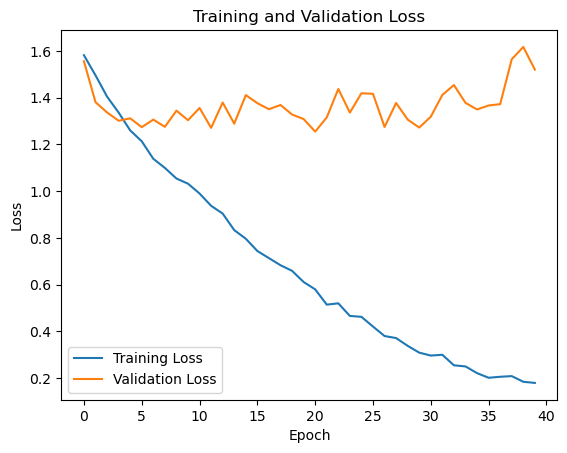

Finished Training
Accuracy of the network on the test images: 56.35 %


56.35

In [120]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_name = 'stl10_optimized'
net_STL_optimized = ConvNet_STL_optimized().to(device)
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.AdamW(net_STL_optimized.parameters(), lr=1e-4)

# Training and validation
re_train = True

if not os.path.exists(f'./best_model_{model_name}.pth') or re_train:
    train_stl(net_STL_optimized, train_data_loader_stl_10, validation_data_loader_stl_10, criterion, model_name=model_name, optimizer=optimizer, epochs=60)
else:
    net_STL_optimized.load_state_dict(torch.load(f'best_model_{model_name}.pth'))

# Validate the model on the test set
validate_stl(net_STL_optimized, test_data_loader_stl_10)


<a id="section-x"></a>
### **Section X: Individual Contribution Report *(Mandatory)***

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.

| Name | Contribution on Research | Contribution on Programming | Contribution on Writing |
| -------- | ------- | ------- | ------- |
| Chileshe | 40 % | 30 % | 30 % |
| Jesse | 30 % | 40 % | 30 % |
| Ruben | 30 % | 30 % | 40 % |

### - End of Notebook -